## Babatunji Stores

This is a project for Babatunji stores as a Retail Data Analyst to build a predictive model and find out the profit returns on each product at a particular store. He needs to understand what type of product, market clusters and store type (location, age, size) will give more profit returns as he plans to expand to more cities in the country.

Thus, from the predictions, Chief Babatunji will understand the key characteristics of items and stores, which drive returns and have better insight on how to proceed with the plan of expansion.

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [78]:
hack = pd.read_csv('htrain.csv')

In [79]:
hack.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.041145,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
hack.dtypes

Item_ID                 object
Store_ID                object
Item_Store_ID           object
Item_Weight            float64
Item_Sugar_Content      object
Item_Visibility        float64
Item_Type               object
Item_Price             float64
Store_Start_Year         int64
Store_Size              object
Store_Location_Type     object
Store_Type              object
Item_Store_Returns     float64
dtype: object

In [5]:
# what;s the total number of null values present
hack.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight               0
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [6]:
# 5-number summary
hack.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4990.00000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.93074,0.071407,391.803796,2004.783567,6103.520164
std,4.69957,0.051763,119.378259,8.283151,4447.333835
min,4.55500,0.003575,78.730000,1992.000000,83.230000
25%,8.77500,0.032039,307.890000,1994.000000,2757.660000
50%,12.65000,0.057754,393.860000,2006.000000,5374.675000
75%,17.20000,0.099286,465.067500,2011.000000,8522.240000
max,21.35000,0.328391,667.220000,2016.000000,32717.410000


In [7]:
hack.corr()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
Item_Weight,1.000000,-0.027061,0.026180,-0.000898,0.009856
Item_Visibility,-0.027061,1.000000,-0.040161,-0.087420,-0.160240
Item_Price,0.026180,-0.040161,1.000000,0.160032,0.518285
Store_Start_Year,-0.000898,-0.087420,0.160032,1.000000,0.051297
Item_Store_Returns,0.009856,-0.160240,0.518285,0.051297,1.000000


### Univariate Analysis

In [8]:
def bar_plot(variable):
    """
        input: variable 
        output: bar plot & value count
    """
    # get feature
    var = hack[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [9]:
hack.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [10]:
category = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

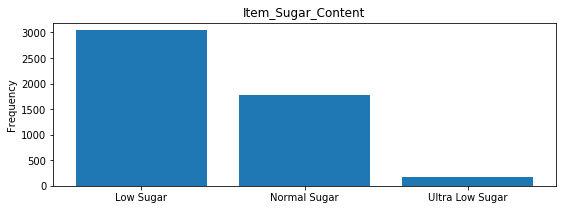

Item_Sugar_Content: 
 Low Sugar          3039
Normal Sugar       1773
Ultra Low Sugar     178
Name: Item_Sugar_Content, dtype: int64


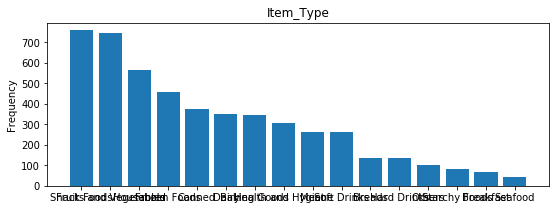

Item_Type: 
 Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Item_Type, dtype: int64


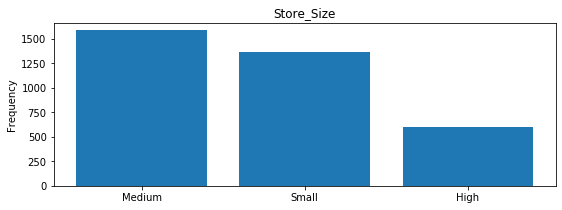

Store_Size: 
 Medium    1582
Small     1364
High       594
Name: Store_Size, dtype: int64


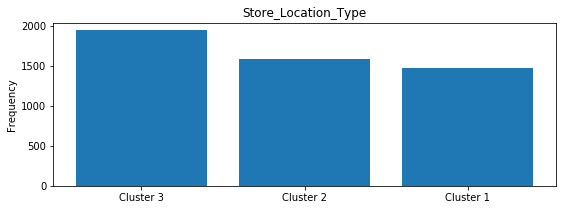

Store_Location_Type: 
 Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Store_Location_Type, dtype: int64


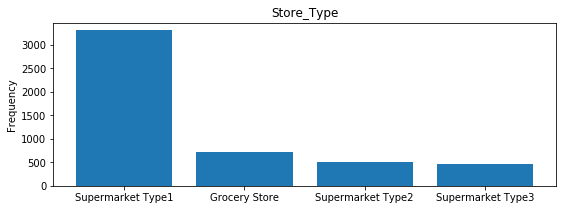

Store_Type: 
 Supermarket Type1    3304
Grocery Store         724
Supermarket Type2     500
Supermarket Type3     462
Name: Store_Type, dtype: int64


In [11]:
# plotting my categorical variables
for i in category:
    bar_plot(i)

#### From the plot above:
* majority of the food is low sugar while ultra low suagr is the least
* Fruits and vegetables and snacks foods are the top sold while the least is sea food
* There are more of medium sized stores (this is subject to change after filling in missing values)
* with little deviation amongst the store location types, the highest is cluster 3
* A large majority of the stores are type1 supermarkets

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(hack[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

In [13]:
hack.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [14]:
numerical = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year', 'Item_Store_Returns']

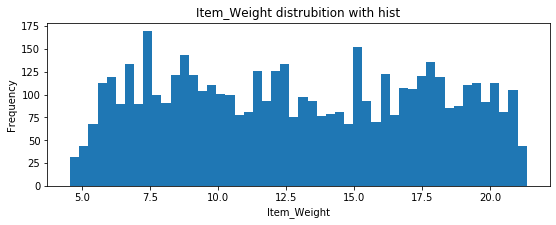

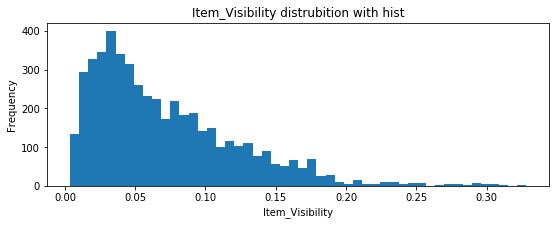

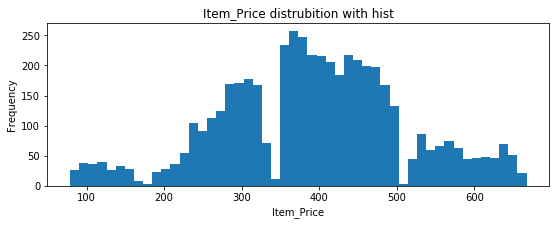

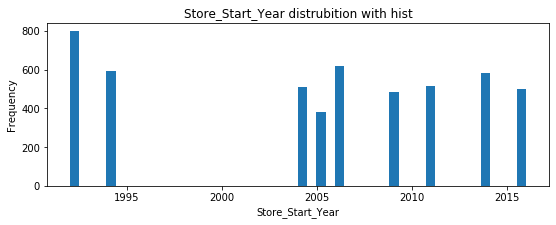

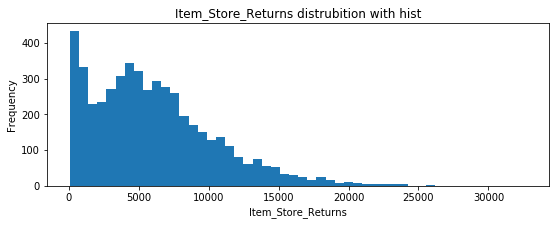

In [15]:
for n in numerical:
    plot_hist(n)

* Majority of the products are sold between 350 and 500
* store returns peaks below 5000

### Bi-variate Analysis

Text(0.5, 0, 'Store_Start_Year')

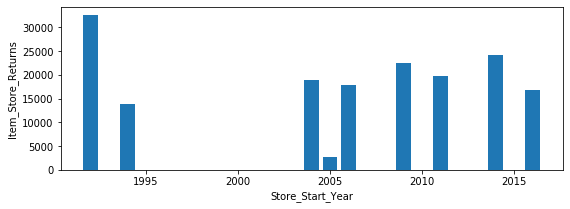

In [16]:
plt.figure(figsize = (9,3))
plt.bar(hack['Store_Start_Year'], hack['Item_Store_Returns'])
plt.ylabel('Item_Store_Returns')
plt.xlabel('Store_Start_Year')

Text(0, 0.5, 'Item_Weight')

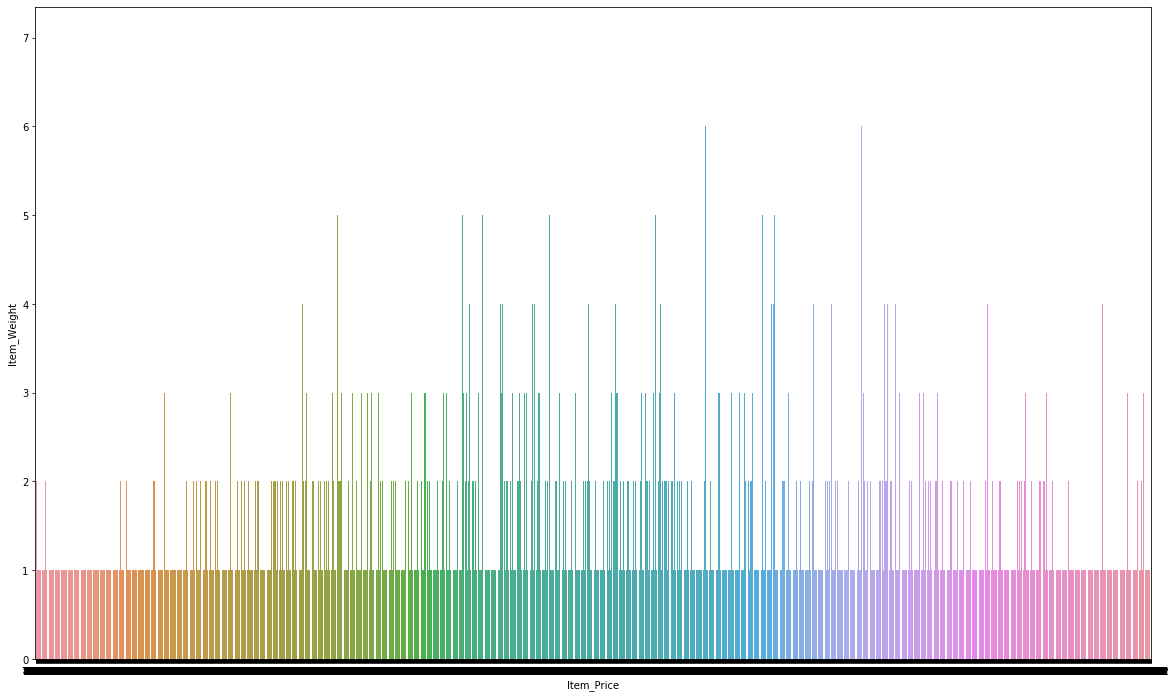

In [17]:
plt.figure(figsize = (20, 12))
sns.countplot(hack['Item_Price'])
plt.xlabel('Item_Price')
plt.ylabel('Item_Weight')

Text(0, 0.5, 'Item_Visibility')

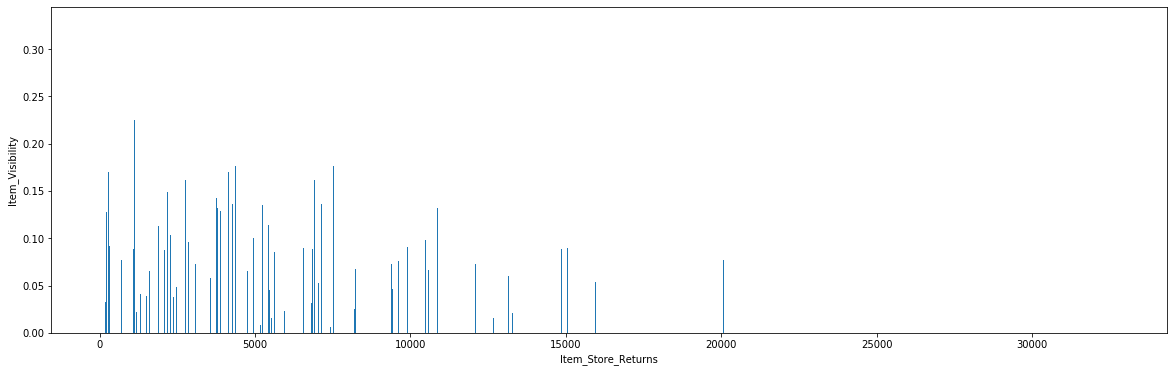

In [18]:
plt.figure(figsize = (20,6))
plt.bar(hack['Item_Store_Returns'], hack['Item_Visibility'])
plt.xlabel('Item_Store_Returns')
plt.ylabel('Item_Visibility')

It lloks as though the visibility of products does not really affect its returns.

Text(0.5, 0, 'Item_Sugar_Content')

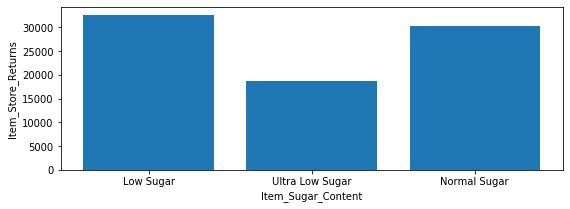

In [19]:
plt.figure(figsize = (9,3))
plt.bar(hack['Item_Sugar_Content'], hack['Item_Store_Returns'])
plt.ylabel('Item_Store_Returns')
plt.xlabel('Item_Sugar_Content')

Text(0.5, 0, 'Store_Location_Type')

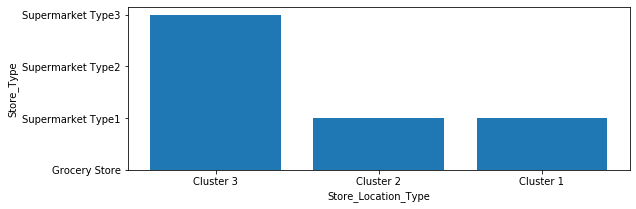

In [20]:
plt.figure(figsize = (9,3))
plt.bar(hack['Store_Location_Type'], hack['Store_Type'])
plt.ylabel('Store_Type')
plt.xlabel('Store_Location_Type')

In [21]:
# cut = pd.cut(hack['Store_Start_Year'], [1992, 1994, 2004, 2005, 2006, 2009, 2011, 2014, 1016])

In [22]:
hack.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

### Multivariate Analysis

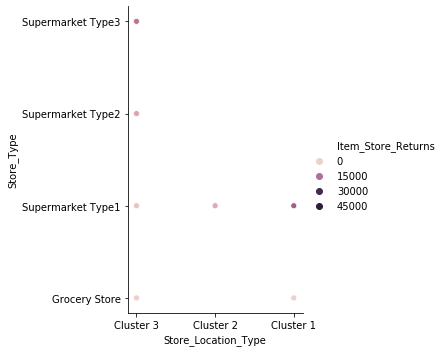

In [23]:
# Determining the relationship between mpg and hp based on transmission (am)
sns.relplot(x='Store_Location_Type', y='Store_Type', hue='Item_Store_Returns', data=hack)

In [24]:
# sns.lmplot('Item_Visibility', 'Item_Price', hue='Item_Store_Returns', data=hack, fit_reg=False);

## Inputing Missing Values

In [80]:
hack.groupby('Store_ID').sum()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
Store_ID,,,,,
BABATUNJI010,4945.9650,40.602889,104234.38,769920,240638.60
BABATUNJI013,7609.2400,38.200352,151975.79,1184436,2407829.22
BABATUNJI017,7535.4550,38.020200,259352.45,1174162,4370201.60
BABATUNJI018,6494.1850,32.619276,192849.77,1008000,2770310.84
BABATUNJI019,4487.9700,38.553103,149500.22,677280,357844.32
BABATUNJI027,5974.2075,29.048555,219606.99,920304,5803269.64
BABATUNJI035,6729.2300,33.335417,237277.16,1035665,4058828.52
BABATUNJI045,6129.1550,31.468113,226543.31,970347,3567311.83
BABATUNJI046,6597.8600,33.221854,181327.58,1020036,2945704.10


The missing values lie in the Store_ID column. After analysis and review, the missing clusters are small-sized supermarkets.

In [81]:
hack = hack.fillna('Small')

In [82]:
hack.isnull().sum().sum()

0

In [65]:
hack.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Small,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.041145,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [95]:
print(hack['Store_ID'].nunique())
print(hack['Item_ID'].nunique())

10
1451


In [101]:
X = hack[['Item_Store_ID', 'Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type', 'Item_Price']]

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,4,5,6,])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [114]:
X.shape

(4990, 8546)

In [117]:
y = np.array(hack['Item_Store_Returns'])

In [115]:
from sklearn.model_selection import train_test_split

In [119]:
y = y.reshape(len(y), 1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [124]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [126]:
linreg.score(X, y)

0.8811140783297251

In [129]:
y_pred = linreg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 480.46 1614.57]
 [6492.64 6145.33]
 [7530.13 3265.75]
 ...
 [ 553.68  427.78]
 [5977.51 8019.56]
 [7643.07 5592.72]]


In [130]:
# compare the actual output values for X_test with the predicted values
auto = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

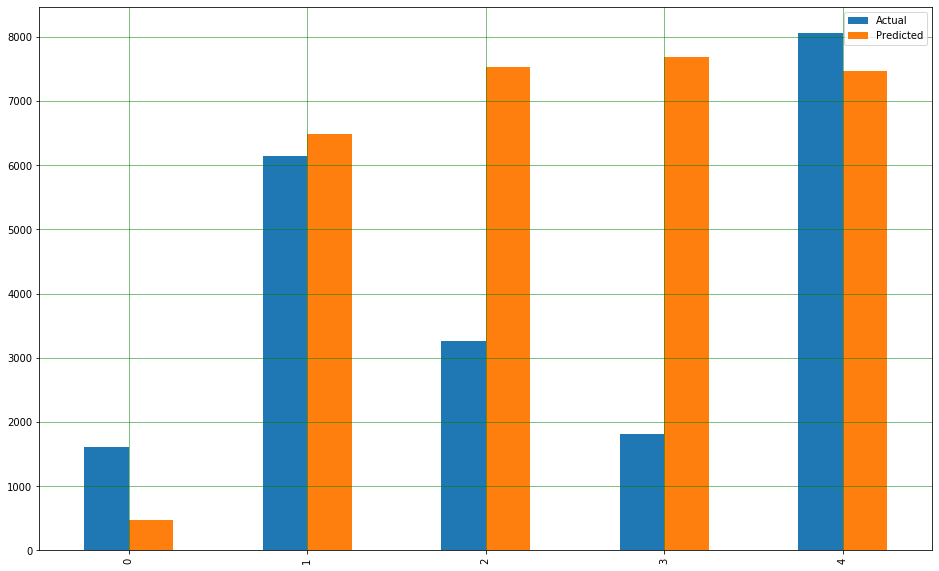

In [131]:
autos1 = auto.head()
autos1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [133]:
ridgereg = Ridge(alpha=1, solver='cholesky')
ridgereg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [134]:
pred = ridgereg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[ 653.77 1614.57]
 [6208.2  6145.33]
 [7610.32 3265.75]
 ...
 [ 486.32  427.78]
 [6346.67 8019.56]
 [7663.23 5592.72]]


In [135]:
# compare the actual output values for X_test with the predicted values
rid = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

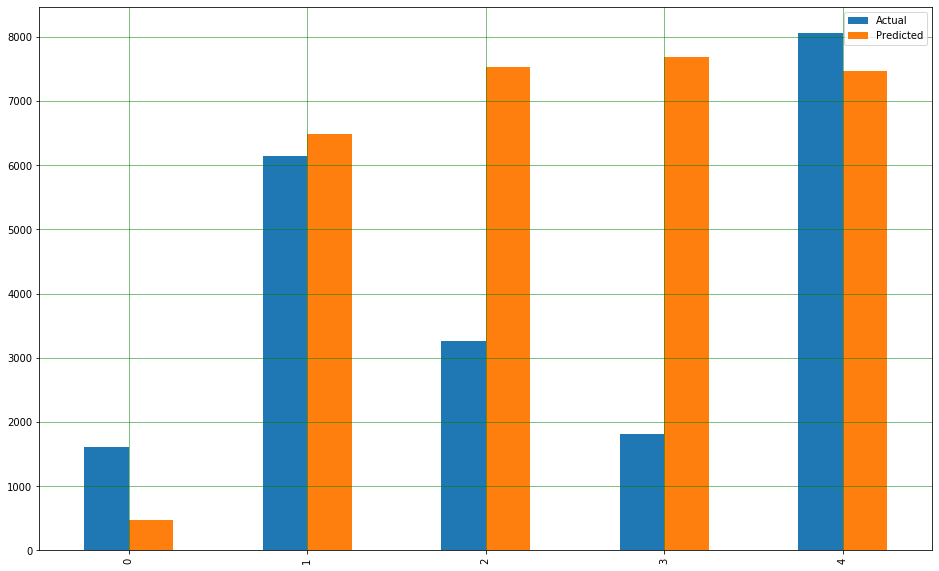

In [136]:
rig = rid.head()
rig.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [137]:
ridgereg.score(X,y)

0.8291879753888098

## Decision Tree Regressor

In [138]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [141]:
# compare the actual output values for X_test with the predicted values
rid = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': regressor.predict(X_test).flatten()})

In [140]:
regressor.score(X, y)

0.8580944932802261

In [142]:
rid

,Actual,Predicted
0,1614.57,878.86
1,6145.33,4194.54
2,3265.75,7556.83
3,1810.98,6469.91
4,8062.84,6980.91
...,...,...
993,8570.51,4534.10
994,9777.27,6734.57
995,427.78,878.86
996,8019.56,6055.45


## Support Vector Regression

In [143]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [145]:
# compare the actual output values for X_test with the predicted values
svm = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': svr.predict(X_test).flatten()})

In [146]:
svm.head()

,Actual,Predicted
0,1614.57,5274.861438
1,6145.33,5360.242859
2,3265.75,5408.542413
3,1810.98,5411.443055
4,8062.84,5407.704640


In [148]:
svr.score(X,y)

-0.016355807767845176

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform(X_test))